In [1]:
import numpy as np
import matplotlib.pyplot as plt

from algorithms.gam import gam
from algorithms.lv_hba import lv_hba
from algorithms.blooc import blooc
from algorithms.salvf_cvxpy import salvf

from utils import *

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
plt.rcParams.update({'font.size': 18})
plt.rcParams['font.sans-serif']=['Arial']
plt.rcParams['axes.unicode_minus']=False

In [4]:
epochs = 18
seeds = 10

In [5]:
hparams = {
    'lv_hba': {
        'alpha': 0.01,
        'gama1': 0.1,
        'gama2': 0.1,
        'yita': 0.001
    },
    'gam': {
        'alpha': 0.05,
        'epsilon': 0.005
    },
    'blooc': {
        'gam': 12.,
        'eta': 0.01,
        'T': 20,
        'Ty': 20,
        'eta1g': 0.001,
        'eta1F': 0.00001,
        'eta2g': 0.0001,
        'eta2F': 0.0001
    },
    'salvf': {
        'gam': 5.,
        'alpha':0.01,
        'eta': 0.01,
        'T': 20,
        'Ty': 20,
        'eta1g': 0.001,
        'eta1F': 0.00001,
        'eta2g': 0.0001,
        'eta2F': 0.0001
    }
}

# Dataset Diabetes

In [6]:
dataset_name = "diabetes"
data = load_diabetes()

n_train = 500
n_val = 150

metrics_diabetes = {}
variables_diabetes = {}

algs = ['salvf','blooc', 'lv_hba', 'gam']
# algs = ['salvf']

for a in algs:
    metrics_diabetes[a] = []
    variables_diabetes[a] = []

In [ ]:
# algs = ['salvf']
for seed in range(seeds):

    print(f"Starting seed {seed+1}/{seeds}: ", end="")

    x_train, y_train, x_val, y_val, x_test, y_test = train_val_test_split(data, seed, n_train, n_val)

    for alg in algs:
        print(f"{alg}", end=" ")

        metrics_seed, variables_seed = eval(alg)(x_train, y_train, x_val, y_val, x_test, y_test, hparams[alg], epochs, verbose=True)
        metrics_diabetes[alg].append(metrics_seed)
        variables_diabetes[alg].append(variables_seed)
    print("DONE")

Starting seed 1/10: salvf Epoch [0/18]: val acc: 0.64 val loss: 1867.27 test acc: 0.69 test loss: 39.29
blooc Epoch [0/18]: val acc: 0.64 val loss: 3.30 test acc: 0.69 test loss: 3.00
lv_hba val acc: 0.64 val loss: 1867.27 test acc: 0.69 test loss: 39.29 round: 0
gam val acc: 0.64 val loss: 1867.27 test acc: 0.69 test loss: 39.29 round: 0
DONE
Starting seed 2/10: salvf Epoch [0/18]: val acc: 0.65 val loss: 604.32 test acc: 0.64 test loss: 4014.73
blooc Epoch [0/18]: val acc: 0.65 val loss: 3.21 test acc: 0.64 test loss: 3.27
lv_hba val acc: 0.65 val loss: 604.32 test acc: 0.64 test loss: 4014.73 round: 0
gam val acc: 0.65 val loss: 604.32 test acc: 0.64 test loss: 4014.73 round: 0
DONE
Starting seed 3/10: salvf Epoch [0/18]: val acc: 0.64 val loss: 34932.47 test acc: 0.64 test loss: 316.28
blooc Epoch [0/18]: val acc: 0.64 val loss: 3.30 test acc: 0.64 test loss: 3.33
lv_hba val acc: 0.64 val loss: 34932.47 test acc: 0.64 test loss: 316.28 round: 0
gam val acc: 0.64 val loss: 34932.47 

## Evaluation

In [8]:
results_path = ''

#f'../results/hyperparam_opt/{dataset_name}/'


In [9]:
metrics_lvhba = metrics_diabetes['lv_hba']
metrics_gam = metrics_diabetes['gam']
metrics_blooc = metrics_diabetes['blooc']
metrics_salvf = metrics_diabetes['salvf']

axis_lvhba = np.array([[x['time_computation'] for x in metric] for metric in metrics_lvhba]).mean(0)
axis_gam = np.array([[x['time_computation'] for x in metric] for metric in metrics_gam]).mean(0)
axis_blooc = np.array([[x['time_computation'] for x in metric] for metric in metrics_blooc]).mean(0)
axis_salvf = np.array([[x['time_computation'] for x in metric] for metric in metrics_salvf]).mean(0)

axis_iter = np.arange(epochs)

In [10]:
train_acc_lvhba = np.array([[x['train_acc'] for x in metric] for metric in metrics_lvhba])
train_acc_gam = np.array([[x['train_acc'] for x in metric] for metric in metrics_gam])
train_acc_blooc = np.array([[x['train_acc_F'] for x in metric] for metric in metrics_blooc])
train_acc_salvf = np.array([[x['train_acc_F'] for x in metric] for metric in metrics_blooc])

val_acc_lvhba = np.array([[x['val_acc'] for x in metric] for metric in metrics_lvhba])
val_acc_gam = np.array([[x['val_acc'] for x in metric] for metric in metrics_gam])
val_acc_blooc = np.array([[x['val_acc_F'] for x in metric] for metric in metrics_blooc])
val_acc_salvf = np.array([[x['val_acc_F'] for x in metric] for metric in metrics_salvf])

test_acc_lvhba = np.array([[x['test_acc'] for x in metric] for metric in metrics_lvhba])
test_acc_gam = np.array([[x['test_acc'] for x in metric] for metric in metrics_gam])
test_acc_blooc = np.array([[x['test_acc_F'] for x in metric] for metric in metrics_blooc])
test_acc_salvf = np.array([[x['test_acc_F'] for x in metric] for metric in metrics_salvf])

In [11]:
val_loss_lvhba = np.array([[x['val_loss'] for x in metric] for metric in metrics_lvhba])[:,0:]
val_loss_gam = np.array([[x['val_loss'] for x in metric] for metric in metrics_gam])[:,0:]
val_loss_blooc = np.array([[x['val_loss_F'] for x in metric] for metric in metrics_blooc])[:,0:]
val_loss_salvf = np.array([[x['val_loss'] for x in metric] for metric in metrics_salvf])[:,0:]

test_loss_lvhba = np.array([[x['test_loss'] for x in metric] for metric in metrics_lvhba])[:,0:]
test_loss_gam = np.array([[x['test_loss'] for x in metric] for metric in metrics_gam])[:,0:]
test_loss_blooc = np.array([[x['test_loss_F'] for x in metric] for metric in metrics_blooc])[:,0:]
test_loss_salvf = np.array([[x['test_loss'] for x in metric] for metric in metrics_salvf])[:,0:]

lower_loss_lvhba = np.array([[x['loss_lower'] for x in metric] for metric in metrics_lvhba])[:,1:]
lower_loss_ga = np.array([[x['loss_lower'] for x in metric] for metric in metrics_gam])[:,1:]
lower_loss_blooc = np.array([[x['loss_lower'] for x in metric] for metric in metrics_blooc])[:,1:]
lower_loss_salvf = np.array([[x['loss_lower'] for x in metric] for metric in metrics_salvf])[:,1:]

# constraint_violation_lvhba = np.array([[x['constraint_violation'] for x in metric] for metric in metrics_lvhba])[:,1:]
# constraint_violation_salvf = np.array([[x['constraint_violation'] for x in metric] for metric in metrics_salvf])[:,1:]

In [12]:
val_acc_salvf[3]

array([0.64      , 0.76666665, 0.76666665, 0.76666665, 0.76666665,
       0.76      , 0.76      , 0.75333333, 0.75333333, 0.76      ,
       0.75333333, 0.74      , 0.74666667, 0.73333335, 0.73333335,
       0.7266667 , 0.72      , 0.70666665, 0.7133333 , 0.7133333 ,
       0.70666665, 0.70666665, 0.6666667 , 0.64      , 0.6066667 ,
       0.54      , 0.42666668, 0.38      , 0.36666667, 0.36      ,
       0.36      , 0.36      , 0.36      , 0.36      , 0.36      ,
       0.36      , 0.36      , 0.36      , 0.36      , 0.36      ,
       0.36      , 0.36      , 0.36      , 0.36      , 0.36      ,
       0.36      , 0.36      , 0.36      , 0.36      , 0.36      ,
       0.36      , 0.36      , 0.36      , 0.36      , 0.36      ,
       0.36      , 0.36      , 0.36      , 0.36      , 0.36      ,
       0.36      , 0.36      , 0.36      , 0.36      , 0.36      ,
       0.36      , 0.36      , 0.36      , 0.36      , 0.36      ,
       0.36      , 0.36      , 0.36      , 0.36      , 0.36   

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

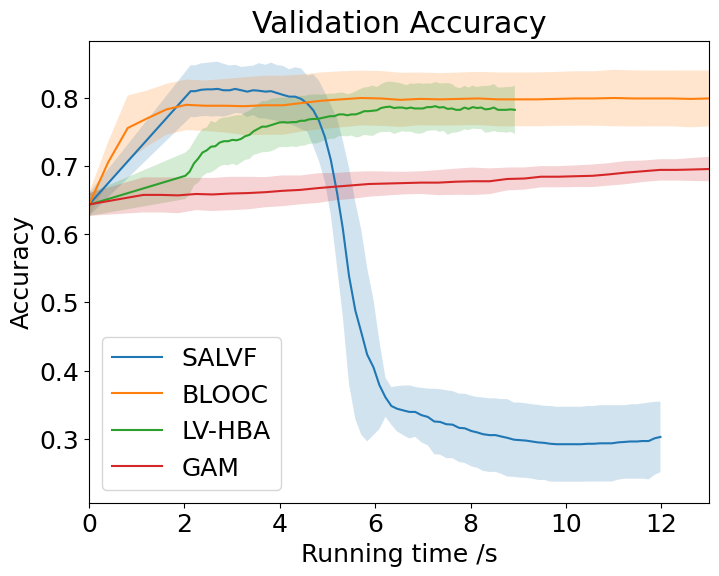

In [13]:
plt.figure(figsize=(8,6))

plt.plot(axis_salvf,val_acc_salvf.mean(0),'-',label="SALVF")
plt.fill_between(axis_salvf,val_acc_salvf.mean(0)-val_acc_salvf.std(0),val_acc_salvf.mean(0)+val_acc_salvf.std(0),alpha=0.2)

plt.plot(axis_blooc,val_acc_blooc.mean(0),'-',label="BLOOC")
plt.fill_between(axis_blooc,val_acc_blooc.mean(0)-val_acc_blooc.std(0),val_acc_blooc.mean(0)+val_acc_blooc.std(0),alpha=0.2)

plt.plot(axis_lvhba,val_acc_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(axis_lvhba,val_acc_lvhba.mean(0)-val_acc_lvhba.std(0),val_acc_lvhba.mean(0)+val_acc_lvhba.std(0),alpha=0.2)

plt.plot(axis_gam,val_acc_gam.mean(0),'-',label="GAM")
plt.fill_between(axis_gam,val_acc_gam.mean(0)-val_acc_gam.std(0),val_acc_gam.mean(0)+val_acc_gam.std(0),alpha=0.2)


plt.legend()
plt.title('Validation Accuracy')
plt.xlabel('Running time /s')
plt.ylabel("Accuracy")
plt.xlim([0,13])
plt.savefig(results_path + 'val_accuracy_running_time.pdf', bbox_inches="tight")

array([[0.76      , 0.76      , 0.76666665, 0.76666665, 0.76666665,
        0.7733333 , 0.78      , 0.78      , 0.78      , 0.7866667 ,
        0.7866667 , 0.79333335, 0.79333335, 0.79333335, 0.79333335,
        0.8       , 0.8       , 0.8       , 0.82      ],
       [0.87333333, 0.87333333, 0.88      , 0.88      , 0.88      ,
        0.88666666, 0.88      , 0.88      , 0.88      , 0.86      ,
        0.86      , 0.86      , 0.86      , 0.86      , 0.85333335,
        0.8466667 , 0.8466667 , 0.85333335, 0.84      ],
       [0.76      , 0.76      , 0.76      , 0.76      , 0.76      ,
        0.76      , 0.76      , 0.7733333 , 0.7733333 , 0.76666665,
        0.76666665, 0.76666665, 0.76666665, 0.76666665, 0.76666665,
        0.76666665, 0.76666665, 0.76666665, 0.76666665],
       [0.76666665, 0.76666665, 0.76666665, 0.76666665, 0.76      ,
        0.76      , 0.75333333, 0.75333333, 0.76      , 0.75333333,
        0.74      , 0.74666667, 0.73333335, 0.73333335, 0.7266667 ,
        0.72 

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

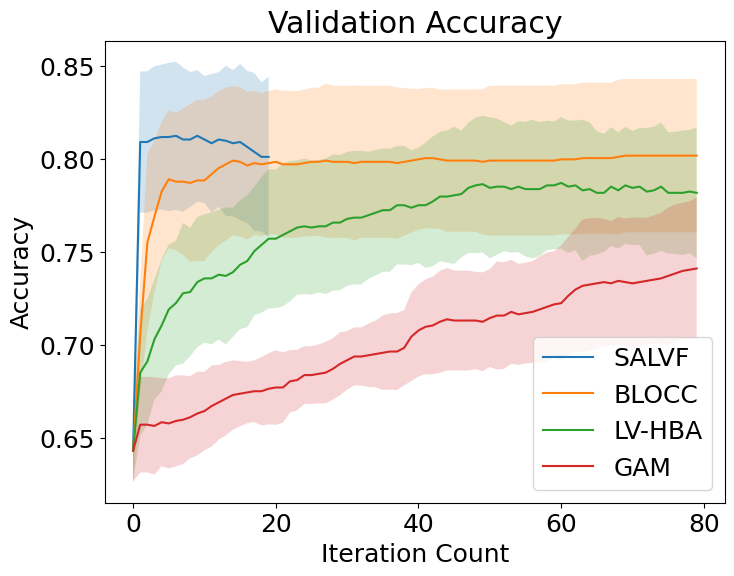

In [26]:
plt.figure(figsize=(8,6))

iter_axis = np.arange(val_acc_gam.shape[1])


plt.plot(axis_iter[0:20],val_acc_salvf.mean(0),'-',label="SALVF")
plt.fill_between(axis_iter[0:20],val_acc_salvf.mean(0)-val_acc_salvf.std(0),val_acc_salvf.mean(0)+val_acc_salvf.std(0),alpha=0.2)

plt.plot(axis_iter,val_acc_blooc.mean(0),'-',label="BLOCC")
plt.fill_between(axis_iter,val_acc_blooc.mean(0)-val_acc_blooc.std(0),val_acc_blooc.mean(0)+val_acc_blooc.std(0),alpha=0.2)

plt.plot(axis_iter,val_acc_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(axis_iter,val_acc_lvhba.mean(0)-val_acc_lvhba.std(0),val_acc_lvhba.mean(0)+val_acc_lvhba.std(0),alpha=0.2)

plt.plot(axis_iter,val_acc_gam.mean(0),'-',label="GAM")
plt.fill_between(axis_iter,val_acc_gam.mean(0)-val_acc_gam.std(0),val_acc_gam.mean(0)+val_acc_gam.std(0),alpha=0.2)

plt.legend()
plt.title('Validation Accuracy')
plt.xlabel('Iteration Count')
plt.ylabel("Accuracy")


plt.savefig(results_path + 'val_accuracy_iteration.pdf', bbox_inches="tight")

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

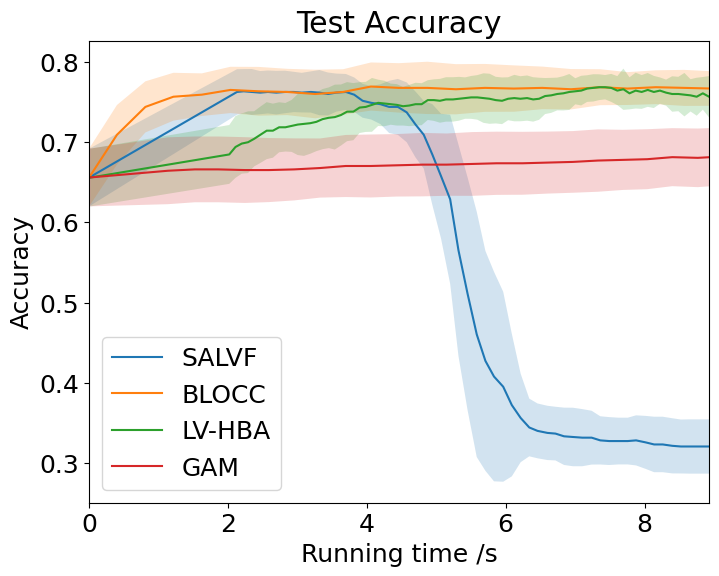

In [15]:
plt.figure(figsize=(8,6))

plt.plot(axis_salvf,test_acc_salvf.mean(0),'-',label="SALVF")
plt.fill_between(axis_salvf,test_acc_salvf.mean(0)-test_acc_salvf.std(0),test_acc_salvf.mean(0)+test_acc_salvf.std(0),alpha=0.2)

plt.plot(axis_blooc,test_acc_blooc.mean(0),'-',label="BLOCC")
plt.fill_between(axis_blooc,test_acc_blooc.mean(0)-test_acc_blooc.std(0),test_acc_blooc.mean(0)+test_acc_blooc.std(0),alpha=0.2)

plt.plot(axis_lvhba,test_acc_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(axis_lvhba,test_acc_lvhba.mean(0)-test_acc_lvhba.std(0),test_acc_lvhba.mean(0)+test_acc_lvhba.std(0),alpha=0.2)

plt.plot(axis_gam,test_acc_gam.mean(0),'-',label="GAM")
plt.fill_between(axis_gam,test_acc_gam.mean(0)-test_acc_gam.std(0),test_acc_gam.mean(0)+test_acc_gam.std(0),alpha=0.2)

plt.legend()
plt.title('Test Accuracy')
plt.xlabel('Running time /s')
plt.ylabel("Accuracy")

plt.xlim([0,axis_lvhba.max()])
plt.savefig(results_path + 'test_accuracy_running_time.pdf', bbox_inches="tight")

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

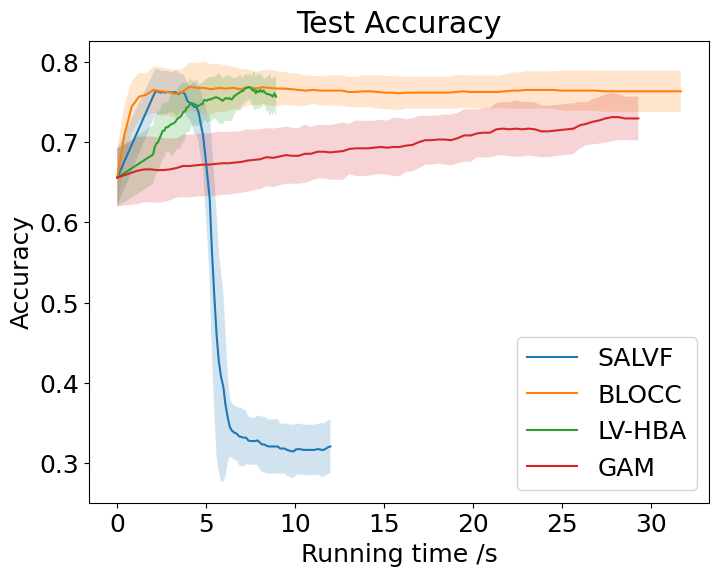

In [16]:
plt.figure(figsize=(8,6))

plt.plot(axis_salvf,test_acc_salvf.mean(0),'-',label="SALVF")
plt.fill_between(axis_salvf,test_acc_salvf.mean(0)-test_acc_salvf.std(0),test_acc_salvf.mean(0)+test_acc_salvf.std(0),alpha=0.2)

plt.plot(axis_blooc,test_acc_blooc.mean(0),'-',label="BLOCC")
plt.fill_between(axis_blooc,test_acc_blooc.mean(0)-test_acc_blooc.std(0),test_acc_blooc.mean(0)+test_acc_blooc.std(0),alpha=0.2)

plt.plot(axis_lvhba,test_acc_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(axis_lvhba,test_acc_lvhba.mean(0)-test_acc_lvhba.std(0),test_acc_lvhba.mean(0)+test_acc_lvhba.std(0),alpha=0.2)

plt.plot(axis_gam,test_acc_gam.mean(0),'-',label="GAM")
plt.fill_between(axis_gam,test_acc_gam.mean(0)-test_acc_gam.std(0),test_acc_gam.mean(0)+test_acc_gam.std(0),alpha=0.2)

plt.legend()
plt.title('Test Accuracy')
plt.xlabel('Running time /s')
plt.ylabel("Accuracy")


plt.savefig(results_path + 'test_accuracy_running_time.pdf', bbox_inches="tight")

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

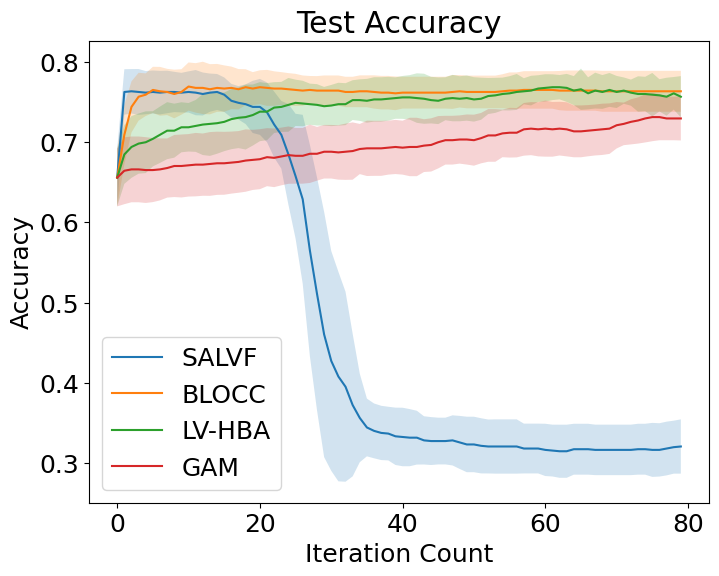

In [17]:
plt.figure(figsize=(8,6))

plt.plot(axis_iter,test_acc_salvf.mean(0),'-',label="SALVF")
plt.fill_between(axis_iter,test_acc_salvf.mean(0)-test_acc_salvf.std(0),test_acc_salvf.mean(0)+test_acc_salvf.std(0),alpha=0.2)

plt.plot(axis_iter,test_acc_blooc.mean(0),'-',label="BLOCC")
plt.fill_between(axis_iter,test_acc_blooc.mean(0)-test_acc_blooc.std(0),test_acc_blooc.mean(0)+test_acc_blooc.std(0),alpha=0.2)

plt.plot(axis_iter,test_acc_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(axis_iter,test_acc_lvhba.mean(0)-test_acc_lvhba.std(0),test_acc_lvhba.mean(0)+test_acc_lvhba.std(0),alpha=0.2)

plt.plot(axis_iter,test_acc_gam.mean(0),'-',label="GAM")
plt.fill_between(axis_iter,test_acc_gam.mean(0)-test_acc_gam.std(0),test_acc_gam.mean(0)+test_acc_gam.std(0),alpha=0.2)

plt.legend()
plt.title('Test Accuracy')
plt.xlabel('Iteration Count')
plt.ylabel("Accuracy")
plt.savefig(results_path + 'test_accuracy_iteration.pdf', bbox_inches="tight")

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

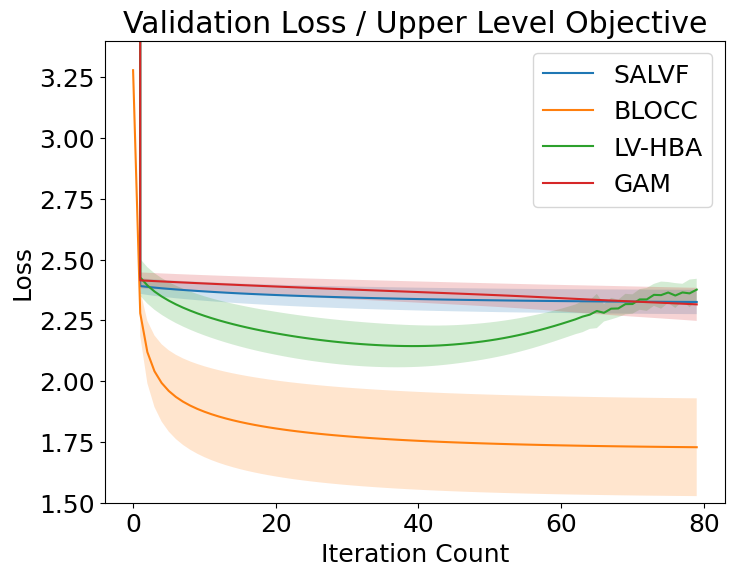

In [18]:
plt.figure(figsize=(8,6))

plt.plot(iter_axis,val_loss_salvf.mean(0),'-',label="SALVF")
fill_dn_salvf = val_loss_salvf.mean(0)-val_loss_salvf.std(0)
fill_up_salvf = val_loss_salvf.mean(0)+val_loss_salvf.std(0)
plt.fill_between(iter_axis[1:],fill_dn_salvf[1:],fill_up_salvf[1:],alpha=0.2)


plt.plot(iter_axis,val_loss_blooc.mean(0),'-',label="BLOCC")
fill_dn_blooc = val_loss_blooc.mean(0)-val_loss_blooc.std(0)
fill_up_blooc = val_loss_blooc.mean(0)+val_loss_blooc.std(0)
plt.fill_between(iter_axis[1:],fill_dn_blooc[1:],fill_up_blooc[1:],alpha=0.2)

plt.plot(iter_axis,val_loss_lvhba.mean(0),'-',label="LV-HBA")
fill_dn_LV = val_loss_lvhba.mean(0)-val_loss_lvhba.std(0)
fill_up_LV = val_loss_lvhba.mean(0)+val_loss_lvhba.std(0)
plt.fill_between(iter_axis[1:],fill_dn_LV[1:],fill_up_LV[1:],alpha=0.2)

plt.plot(iter_axis,val_loss_gam.mean(0),'-',label="GAM")
fill_up_GAM = val_loss_gam.mean(0)-val_loss_gam.std(0)
fill_dn_GAM = val_loss_gam.mean(0)+val_loss_gam.std(0)
plt.fill_between(iter_axis[1:],fill_dn_GAM[1:],fill_up_GAM[1:],alpha=0.2)

plt.legend()
plt.title('Validation Loss / Upper Level Objective')
plt.xlabel('Iteration Count')
plt.ylabel("Loss")

plt.ylim([1.5,3.4])
plt.savefig(results_path + 'upper_obj_iteration.pdf', bbox_inches="tight")

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

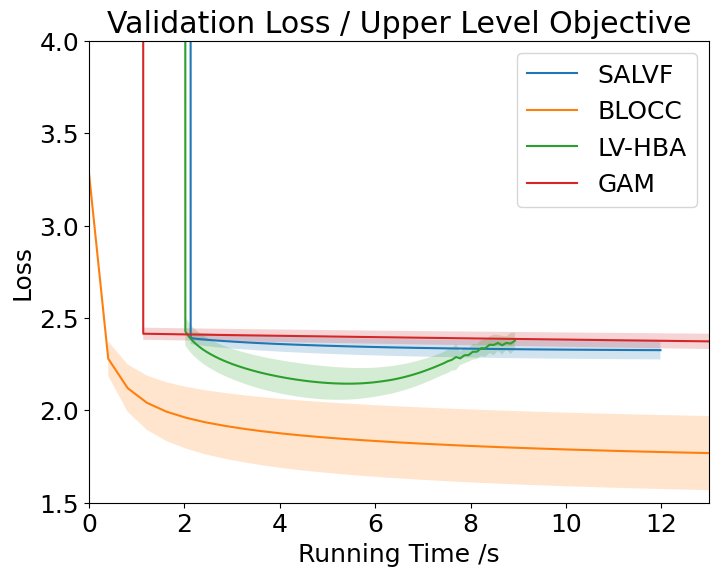

In [19]:
plt.figure(figsize=(8,6))

plt.plot(axis_salvf,val_loss_salvf.mean(0),'-',label="SALVF")
fill_dn_salvf = val_loss_salvf.mean(0)-val_loss_salvf.std(0)
fill_up_salvf = val_loss_salvf.mean(0)+val_loss_salvf.std(0)
plt.fill_between(axis_salvf[1:],fill_dn_salvf[1:],fill_up_salvf[1:],alpha=0.2)


plt.plot(axis_blooc,val_loss_blooc.mean(0),'-',label="BLOCC")
fill_dn_blooc = val_loss_blooc.mean(0)-val_loss_blooc.std(0)
fill_up_blooc = val_loss_blooc.mean(0)+val_loss_blooc.std(0)
plt.fill_between(axis_blooc[1:],fill_dn_blooc[1:],fill_up_blooc[1:],alpha=0.2)

plt.plot(axis_lvhba,val_loss_lvhba.mean(0),'-',label="LV-HBA")
fill_dn_LV = val_loss_lvhba.mean(0)-val_loss_lvhba.std(0)
fill_up_LV = val_loss_lvhba.mean(0)+val_loss_lvhba.std(0)
plt.fill_between(axis_lvhba[1:],fill_dn_LV[1:],fill_up_LV[1:],alpha=0.2)

plt.plot(axis_gam,val_loss_gam.mean(0),'-',label="GAM")
fill_up_GAM = val_loss_gam.mean(0)-val_loss_gam.std(0)
fill_dn_GAM = val_loss_gam.mean(0)+val_loss_gam.std(0)
plt.fill_between(axis_gam[1:],fill_dn_GAM[1:],fill_up_GAM[1:],alpha=0.2)

plt.legend()
plt.title('Validation Loss / Upper Level Objective')
plt.xlabel('Running Time /s')
plt.ylabel("Loss")

plt.ylim([1.5,4])
plt.xlim([0,13])
plt.savefig(results_path + 'upper_obj_time.pdf', bbox_inches="tight")

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

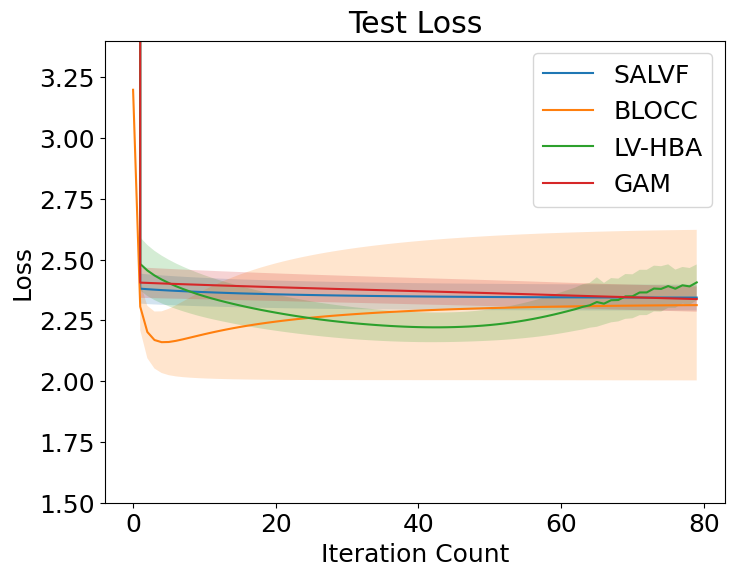

In [20]:
plt.figure(figsize=(8,6))

plt.plot(iter_axis,test_loss_salvf.mean(0),'-',label="SALVF")
fill_dn_salvf = test_loss_salvf.mean(0)-test_loss_salvf.std(0)
fill_up_salvf = test_loss_salvf.mean(0)+test_loss_salvf.std(0)
plt.fill_between(iter_axis[1:],fill_dn_salvf[1:],fill_up_salvf[1:],alpha=0.2)

plt.plot(iter_axis,test_loss_blooc.mean(0),'-',label="BLOCC")
fill_dn_blooc = test_loss_blooc.mean(0)-test_loss_blooc.std(0)
fill_up_blooc = test_loss_blooc.mean(0)+test_loss_blooc.std(0)
plt.fill_between(iter_axis[1:],fill_dn_blooc[1:],fill_up_blooc[1:],alpha=0.2)

plt.plot(iter_axis,test_loss_lvhba.mean(0),'-',label="LV-HBA")
fill_dn_LV = test_loss_lvhba.mean(0)-test_loss_lvhba.std(0)
fill_up_LV = test_loss_lvhba.mean(0)+test_loss_lvhba.std(0)
plt.fill_between(iter_axis[1:],fill_dn_LV[1:],fill_up_LV[1:],alpha=0.2)

plt.plot(iter_axis,test_loss_gam.mean(0),'-',label="GAM")
fill_up_GAM = test_loss_gam.mean(0)-test_loss_gam.std(0)
fill_dn_GAM = test_loss_gam.mean(0)+test_loss_gam.std(0)
plt.fill_between(iter_axis[1:],fill_dn_GAM[1:],fill_up_GAM[1:],alpha=0.2)

plt.legend()
plt.title('Test Loss')
plt.xlabel('Iteration Count')
plt.ylabel("Loss")

plt.ylim([1.5,3.4])
plt.savefig(results_path + 'test_obj_iteration.pdf', bbox_inches="tight")

TypeError: loop of ufunc does not support argument 0 of type numpy.float64 which has no callable sqrt method

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

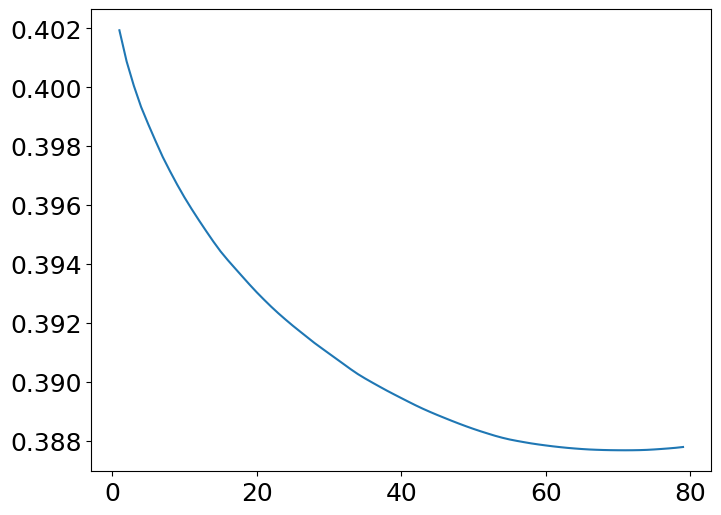

In [21]:
plt.figure(figsize=(8,6))

plt.plot(iter_axis[1:],lower_loss_salvf.mean(0),'-',label="SALVF")
fill_dn_salvf = lower_loss_salvf.mean(0)-lower_loss_salvf.std(0)
fill_up_salvf = lower_loss_salvf.mean(0)+lower_loss_salvf.std(0)
plt.fill_between(iter_axis[1:],fill_dn_salvf,fill_up_salvf,alpha=0.2)

plt.plot(iter_axis[1:],lower_loss_blooc.mean(0),'-',label="BLOCC")
fill_dn_blooc = lower_loss_blooc.mean(0)-lower_loss_blooc.std(0)
fill_up_blooc = lower_loss_blooc.mean(0)+lower_loss_blooc.std(0)
plt.fill_between(iter_axis[1:],fill_dn_blooc,fill_up_blooc,alpha=0.2)

plt.plot(iter_axis[1:],lower_loss_lvhba.mean(0),'-',label="LV-HBA")
fill_dn_LV = lower_loss_lvhba.mean(0)-lower_loss_lvhba.std(0)
fill_up_LV = lower_loss_lvhba.mean(0)+lower_loss_lvhba.std(0)
plt.fill_between(iter_axis[1:],fill_dn_LV,fill_up_LV,alpha=0.2)

plt.plot(iter_axis[1:],lower_loss_ga.mean(0),'-',label="GAM")
fill_up_GAM = lower_loss_ga.mean(0)-lower_loss_ga.std(0)
fill_dn_GAM = lower_loss_ga.mean(0)+lower_loss_ga.std(0)
plt.fill_between(iter_axis[1:],fill_dn_GAM,fill_up_GAM,alpha=0.2)

plt.legend()
# plt.title('Lower Loss')
# plt.xlabel('Iteration Count')
# plt.ylabel("Loss")

plt.savefig(results_path + 'lower_obj_iteration.pdf', bbox_inches="tight")

In [21]:
# plt.figure(figsize=(8,6))

# plt.plot(iter_axis[1:],constraint_violation_ours.mean(0),'-',label="BLOCC")
# # fill_dn_ours = constraint_violation_ours.mean(0)-constraint_violation_ours.std(0)
# # fill_up_ours = constraint_violation_ours.mean(0)+constraint_violation_ours.std(0)
# # plt.fill_between(iter_axis[1:],fill_dn_ours,fill_up_ours,alpha=0.2)

# plt.plot(iter_axis[1:],constraint_violation_lvhba.mean(0),'-',label="LV-HBA")
# # fill_dn_LV = constraint_violation_lvhba.mean(0)-constraint_violation_lvhba.std(0)
# # fill_up_LV = constraint_violation_lvhba.mean(0)+constraint_violation_lvhba.std(0)
# # plt.fill_between(iter_axis[1:],fill_dn_LV,fill_up_LV,alpha=0.2)

# plt.legend()
# # plt.title('Lower Loss')
# # plt.xlabel('Iteration Count')
# # plt.ylabel("Loss")

# plt.savefig(results_path+'constraint_violation.pdf', bbox_inches="tight")

# Dataset Fourclass

In [41]:
dataset_name = "fourclass"
data = load_fourclass()

n_train = 500
n_val = 150

In [ ]:
metrics_fourclass = {}
variables_fourclass = {}

algs = ['ours', 'lv_hba', 'gam']

for a in algs:
    metrics_fourclass[a] = []
    variables_fourclass[a] = []

for seed in range(seeds):

    print(f"Starting seed {seed+1}/{seeds}: ", end="")

    x_train, y_train, x_val, y_val, x_test, y_test = train_val_test_split(data, seed, n_train, n_val)

    for alg in algs:
        print(f"{alg}", end=" ")

        metrics_seed, variables_seed = eval(alg)(x_train, y_train, x_val, y_val, x_test, y_test, hparams[alg], epochs, verbose=False)
        metrics_fourclass[alg].append(metrics_seed)
        variables_fourclass[alg].append(variables_seed)
    print("DONE")

## Evaluation

In [43]:
results_path = 'fourclass/'#f'../results/hyperparam_opt/{dataset_name}/'

In [44]:
metrics_lvhba = metrics_fourclass['lv_hba']
metrics_gam = metrics_fourclass['gam']
metrics_ours = metrics_fourclass['ours']

axis_lvhba = np.array([[x['time_computation'] for x in metrics] for metrics in metrics_lvhba]).mean(0)
axis_gam = np.array([[x['time_computation'] for x in metrics] for metrics in metrics_gam]).mean(0)
axis_ours = np.array([[x['time_computation'] for x in metrics] for metrics in metrics_ours]).mean(0)

axis_iter = np.arange(epochs)

In [45]:
train_acc_lvhba = np.array([[x['train_acc'] for x in metrics] for metrics in metrics_lvhba])
train_acc_ga = np.array([[x['train_acc'] for x in metrics] for metrics in metrics_gam])
train_acc_ours = np.array([[x['train_acc_F'] for x in metrics] for metrics in metrics_ours])

val_acc_lvhba = np.array([[x['val_acc'] for x in metrics] for metrics in metrics_lvhba])
val_acc_ga = np.array([[x['val_acc'] for x in metrics] for metrics in metrics_gam])
val_acc_ours = np.array([[x['val_acc_F'] for x in metrics] for metrics in metrics_ours])

test_acc_lvhba = np.array([[x['test_acc'] for x in metrics] for metrics in metrics_lvhba])
test_acc_ga = np.array([[x['test_acc'] for x in metrics] for metrics in metrics_gam])
test_acc_ours = np.array([[x['test_acc_F'] for x in metrics] for metrics in metrics_ours])

In [46]:
val_loss_lvhba = np.array([[x['val_loss'] for x in metrics] for metrics in metrics_lvhba])[:,0:]
val_loss_ga = np.array([[x['val_loss'] for x in metrics] for metrics in metrics_gam])[:,0:]
val_loss_ours = np.array([[x['val_loss_F'] for x in metrics] for metrics in metrics_ours])[:,0:]

test_loss_lvhba = np.array([[x['test_loss'] for x in metrics] for metrics in metrics_lvhba])[:,0:]
test_loss_ga = np.array([[x['test_loss'] for x in metrics] for metrics in metrics_gam])[:,0:]
test_loss_ours = np.array([[x['test_loss_F'] for x in metrics] for metrics in metrics_ours])[:,0:]

lower_loss_lvhba = np.array([[x['loss_lower'] for x in metrics] for metrics in metrics_lvhba])[:,1:]
lower_loss_ga = np.array([[x['loss_lower'] for x in metrics] for metrics in metrics_gam])[:,1:]
lower_loss_ours = np.array([[x['loss_lower'] for x in metrics] for metrics in metrics_ours])[:,1:]

# constraint_violation_lvhba = np.array([[x['constraint_violation'] for x in metrics] for metrics in metrics_lvhba])[:,1:]
# constraint_violation_ours = np.array([[x['constraint_violation'] for x in metrics] for metrics in metrics_ours])[:,1:]

In [ ]:
plt.figure(figsize=(8,6))

plt.plot(axis_ours,val_acc_ours.mean(0),'-',label="BLOCC")
plt.fill_between(axis_ours,val_acc_ours.mean(0)-val_acc_ours.std(0),val_acc_ours.mean(0)+val_acc_ours.std(0),alpha=0.2)

plt.plot(axis_lvhba,val_acc_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(axis_lvhba,val_acc_lvhba.mean(0)-val_acc_lvhba.std(0),val_acc_lvhba.mean(0)+val_acc_lvhba.std(0),alpha=0.2)

plt.plot(axis_gam,val_acc_ga.mean(0),'-',label="GAM")
plt.fill_between(axis_gam,val_acc_ga.mean(0)-val_acc_ga.std(0),val_acc_ga.mean(0)+val_acc_ga.std(0),alpha=0.2)


plt.legend()
plt.title('Validation Accuracy')
plt.xlabel('Running time /s')
plt.ylabel("Accuracy")
plt.xlim([0,13])
plt.savefig(results_path + 'val_accuracy_running_time.pdf', bbox_inches="tight")

In [ ]:
plt.figure(figsize=(8,6))

iter_axis = np.arange(val_acc_ga.shape[1])

plt.plot(axis_iter,val_acc_ours.mean(0),'-',label="BLOCC")
plt.fill_between(axis_iter,val_acc_ours.mean(0)-val_acc_ours.std(0),val_acc_ours.mean(0)+val_acc_ours.std(0),alpha=0.2)

plt.plot(axis_iter,val_acc_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(axis_iter,val_acc_lvhba.mean(0)-val_acc_lvhba.std(0),val_acc_lvhba.mean(0)+val_acc_lvhba.std(0),alpha=0.2)

plt.plot(axis_iter,val_acc_ga.mean(0),'-',label="GAM")
plt.fill_between(axis_iter,val_acc_ga.mean(0)-val_acc_ga.std(0),val_acc_ga.mean(0)+val_acc_ga.std(0),alpha=0.2)

plt.legend()
plt.title('Validation Accuracy')
plt.xlabel('Iteration Count')
plt.ylabel("Accuracy")


plt.savefig(results_path + 'val_accuracy_iteration.pdf', bbox_inches="tight")

In [ ]:
plt.figure(figsize=(8,6))

plt.plot(axis_ours,test_acc_ours.mean(0),'-',label="BLOCC")
plt.fill_between(axis_ours,test_acc_ours.mean(0)-test_acc_ours.std(0),test_acc_ours.mean(0)+test_acc_ours.std(0),alpha=0.2)


plt.plot(axis_lvhba,test_acc_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(axis_lvhba,test_acc_lvhba.mean(0)-test_acc_lvhba.std(0),test_acc_lvhba.mean(0)+test_acc_lvhba.std(0),alpha=0.2)

plt.plot(axis_gam,test_acc_ga.mean(0),'-',label="GAM")
plt.fill_between(axis_gam,test_acc_ga.mean(0)-test_acc_ga.std(0),test_acc_ga.mean(0)+test_acc_ga.std(0),alpha=0.2)

plt.legend()
plt.title('Test Accuracy')
plt.xlabel('Running time /s')
plt.ylabel("Accuracy")

plt.xlim([0,axis_lvhba.max()])
plt.savefig(results_path + 'test_accuracy_running_time.pdf', bbox_inches="tight")

In [ ]:
plt.figure(figsize=(8,6))

plt.plot(axis_ours,test_acc_ours.mean(0),'-',label="BLOCC")
plt.fill_between(axis_ours,test_acc_ours.mean(0)-test_acc_ours.std(0),test_acc_ours.mean(0)+test_acc_ours.std(0),alpha=0.2)


plt.plot(axis_lvhba,test_acc_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(axis_lvhba,test_acc_lvhba.mean(0)-test_acc_lvhba.std(0),test_acc_lvhba.mean(0)+test_acc_lvhba.std(0),alpha=0.2)

plt.plot(axis_gam,test_acc_ga.mean(0),'-',label="GAM")
plt.fill_between(axis_gam,test_acc_ga.mean(0)-test_acc_ga.std(0),test_acc_ga.mean(0)+test_acc_ga.std(0),alpha=0.2)

plt.legend()
plt.title('Test Accuracy')
plt.xlabel('Running time /s')
plt.ylabel("Accuracy")

plt.savefig(results_path + 'test_accuracy_running_time.pdf', bbox_inches="tight")

In [ ]:
plt.figure(figsize=(8,6))

plt.plot(axis_iter,test_acc_ours.mean(0),'-',label="BLOCC")
plt.fill_between(axis_iter,test_acc_ours.mean(0)-test_acc_ours.std(0),test_acc_ours.mean(0)+test_acc_ours.std(0),alpha=0.2)

plt.plot(axis_iter,test_acc_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(axis_iter,test_acc_lvhba.mean(0)-test_acc_lvhba.std(0),test_acc_lvhba.mean(0)+test_acc_lvhba.std(0),alpha=0.2)

plt.plot(axis_iter,test_acc_ga.mean(0),'-',label="GAM")
plt.fill_between(axis_iter,test_acc_ga.mean(0)-test_acc_ga.std(0),test_acc_ga.mean(0)+test_acc_ga.std(0),alpha=0.2)

plt.legend()
plt.title('Test Accuracy')
plt.xlabel('Iteration Count')
plt.ylabel("Accuracy")
plt.savefig(results_path + 'test_accuracy_iteration.pdf', bbox_inches="tight")

In [ ]:
plt.figure(figsize=(8,6))

plt.plot(iter_axis,val_loss_ours.mean(0),'-',label="BLOCC")
fill_dn_ours = val_loss_ours.mean(0)-val_loss_ours.std(0)
fill_up_ours = val_loss_ours.mean(0)+val_loss_ours.std(0)
plt.fill_between(iter_axis[1:],fill_dn_ours[1:],fill_up_ours[1:],alpha=0.2)

plt.plot(iter_axis,val_loss_lvhba.mean(0),'-',label="LV-HBA")
fill_dn_LV = val_loss_lvhba.mean(0)-val_loss_lvhba.std(0)
fill_up_LV = val_loss_lvhba.mean(0)+val_loss_lvhba.std(0)
plt.fill_between(iter_axis[1:],fill_dn_LV[1:],fill_up_LV[1:],alpha=0.2)

plt.plot(iter_axis,val_loss_ga.mean(0),'-',label="GAM")
fill_up_GAM = val_loss_ga.mean(0)-val_loss_ga.std(0)
fill_dn_GAM = val_loss_ga.mean(0)+val_loss_ga.std(0)
plt.fill_between(iter_axis[1:],fill_dn_GAM[1:],fill_up_GAM[1:],alpha=0.2)

plt.legend()
plt.title('Validation Loss / Upper Level Objective')
plt.xlabel('Iteration Count')
plt.ylabel("Loss")

plt.ylim([1.5,3.4])
plt.savefig(results_path + 'upper_obj_iteration.pdf', bbox_inches="tight")

In [ ]:
plt.figure(figsize=(8,6))

plt.plot(axis_ours,val_loss_ours.mean(0),'-',label="BLOCC")
fill_dn_ours = val_loss_ours.mean(0)-val_loss_ours.std(0)
fill_up_ours = val_loss_ours.mean(0)+val_loss_ours.std(0)
plt.fill_between(axis_ours[1:],fill_dn_ours[1:],fill_up_ours[1:],alpha=0.2)

plt.plot(axis_lvhba,val_loss_lvhba.mean(0),'-',label="LV-HBA")
fill_dn_LV = val_loss_lvhba.mean(0)-val_loss_lvhba.std(0)
fill_up_LV = val_loss_lvhba.mean(0)+val_loss_lvhba.std(0)
plt.fill_between(axis_lvhba[1:],fill_dn_LV[1:],fill_up_LV[1:],alpha=0.2)

plt.plot(axis_gam,val_loss_ga.mean(0),'-',label="GAM")
fill_up_GAM = val_loss_ga.mean(0)-val_loss_ga.std(0)
fill_dn_GAM = val_loss_ga.mean(0)+val_loss_ga.std(0)
plt.fill_between(axis_gam[1:],fill_dn_GAM[1:],fill_up_GAM[1:],alpha=0.2)

plt.legend()
plt.title('Validation Loss / Upper Level Objective')
plt.xlabel('Running Time /s')
plt.ylabel("Loss")

plt.ylim([1.5,4])
plt.xlim([0,13])
plt.savefig(results_path + 'upper_obj_time.pdf', bbox_inches="tight")

In [ ]:
plt.figure(figsize=(8,6))

plt.plot(iter_axis,test_loss_ours.mean(0),'-',label="BLOCC")
fill_dn_ours = test_loss_ours.mean(0)-test_loss_ours.std(0)
fill_up_ours = test_loss_ours.mean(0)+test_loss_ours.std(0)
plt.fill_between(iter_axis[1:],fill_dn_ours[1:],fill_up_ours[1:],alpha=0.2)

plt.plot(iter_axis,test_loss_lvhba.mean(0),'-',label="LV-HBA")
fill_dn_LV = test_loss_lvhba.mean(0)-test_loss_lvhba.std(0)
fill_up_LV = test_loss_lvhba.mean(0)+test_loss_lvhba.std(0)
plt.fill_between(iter_axis[1:],fill_dn_LV[1:],fill_up_LV[1:],alpha=0.2)

plt.plot(iter_axis,test_loss_ga.mean(0),'-',label="GAM")
fill_up_GAM = test_loss_ga.mean(0)-test_loss_ga.std(0)
fill_dn_GAM = test_loss_ga.mean(0)+test_loss_ga.std(0)
plt.fill_between(iter_axis[1:],fill_dn_GAM[1:],fill_up_GAM[1:],alpha=0.2)

plt.legend()
plt.title('Test Loss')
plt.xlabel('Iteration Count')
plt.ylabel("Loss")

plt.ylim([1.5,3.4])
plt.savefig(results_path + 'test_obj_iteration.pdf', bbox_inches="tight")

In [ ]:
plt.figure(figsize=(8,6))

plt.plot(iter_axis[1:],lower_loss_ours.mean(0),'-',label="BLOCC")
fill_dn_ours = lower_loss_ours.mean(0)-lower_loss_ours.std(0)
fill_up_ours = lower_loss_ours.mean(0)+lower_loss_ours.std(0)
plt.fill_between(iter_axis[1:],fill_dn_ours,fill_up_ours,alpha=0.2)

plt.plot(iter_axis[1:],lower_loss_lvhba.mean(0),'-',label="LV-HBA")
fill_dn_LV = lower_loss_lvhba.mean(0)-lower_loss_lvhba.std(0)
fill_up_LV = lower_loss_lvhba.mean(0)+lower_loss_lvhba.std(0)
plt.fill_between(iter_axis[1:],fill_dn_LV,fill_up_LV,alpha=0.2)

plt.plot(iter_axis[1:],lower_loss_ga.mean(0),'-',label="GAM")
fill_up_GAM = lower_loss_ga.mean(0)-lower_loss_ga.std(0)
fill_dn_GAM = lower_loss_ga.mean(0)+lower_loss_ga.std(0)
plt.fill_between(iter_axis[1:],fill_dn_GAM,fill_up_GAM,alpha=0.2)

plt.legend()
plt.title('Lower Level Objective function')
plt.xlabel('Iteration Count')
plt.ylabel("$f(x_t, y_t)$")

plt.savefig(results_path + 'lower_obj_iteration.pdf', bbox_inches="tight")

In [56]:
# plt.figure(figsize=(8,6))

# plt.plot(iter_axis[1:],constraint_violation_ours.mean(0),'-',label="BLOCC")
# # fill_dn_ours = constraint_violation_ours.mean(0)-constraint_violation_ours.std(0)
# # fill_up_ours = constraint_violation_ours.mean(0)+constraint_violation_ours.std(0)
# # plt.fill_between(iter_axis[1:],fill_dn_ours,fill_up_ours,alpha=0.2)

# plt.plot(iter_axis[1:],constraint_violation_lvhba.mean(0),'-',label="LV-HBA")
# # fill_dn_LV = constraint_violation_lvhba.mean(0)-constraint_violation_lvhba.std(0)
# # fill_up_LV = constraint_violation_lvhba.mean(0)+constraint_violation_lvhba.std(0)
# # plt.fill_between(iter_axis[1:],fill_dn_LV,fill_up_LV,alpha=0.2)

# plt.legend()
# # plt.title('Lower Loss')
# # plt.xlabel('Iteration Count')
# # plt.ylabel("Loss")

# plt.savefig(results_path + 'constraint_violation.pdf', bbox_inches="tight")

# Gamma Sensitivity Analysis

In [58]:
data = load_diabetes()
n_train = 500
n_val = 150

seeds = 5

In [59]:
import cvxpy as cp

def opt_ll(C, x_train, y_train):

    w_opt = cp.Variable(x_train.shape[1])
    b_opt = cp.Variable()
    xi_opt = cp.Variable(y_train.shape[0], nonneg=True)

    loss_lower =  0.5*cp.norm(w_opt, 2)**2

    constraints=[]
    for i in range(y_train.shape[0]):
        constraints.append(1 - xi_opt[i] - y_train[i] * (cp.scalar_product(w_opt, x_train[i])+b_opt) <= 0)

    constraints_xi = [xi_opt <= C]

    obj_lower = cp.Minimize(loss_lower)

    prob_lower = cp.Problem(obj_lower, constraints + constraints_xi)
    prob_lower.solve()

    return w_opt.value, b_opt.value, xi_opt.value

In [ ]:
gamma_vals = np.logspace(-2, 2, 5)

opt_gaps = np.zeros((gamma_vals.shape[0], seeds))
upper_levels = np.zeros((gamma_vals.shape[0], seeds))
for i, gam in enumerate(gamma_vals):

    print(f"{i+1}/{gamma_vals.shape[0]} - Starting gamma: {gam}", flush=True)

    hparams['ours']['gam'] = gam

    for seed in range(seeds):
        x_train, y_train, x_val, y_val, x_test, y_test = train_val_test_split(data, seed, n_train, n_val)
        metrics_seed, variables_seed = ours(x_train, y_train, x_val, y_val, x_test, y_test, hparams['ours'], epochs, verbose=False)

        w_opt, b_opt, xi_opt = opt_ll(variables_seed[-1]['C'], x_train, y_train)
        opt_gaps[i, seed] += np.linalg.norm(variables_seed[-1]['w'].detach().numpy() - w_opt) + \
                       np.linalg.norm(variables_seed[-1]['b'].detach().numpy() - b_opt) + \
                       np.linalg.norm(variables_seed[-1]['xi'].detach().numpy() - xi_opt)
        
        upper_levels[i, seed] += metrics_seed[-1]['loss_upper']
        
    opt_gaps[i] /= seeds
    upper_levels[i] /= seeds

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

ax[0].semilogx(gamma_vals, opt_gaps.mean(1), 'o-')
ax[0].set_ylabel("$|y^*-y^T|$", fontsize=14)
ax[0].set_xlabel("$\\gamma$", fontsize=18)

ax[1].errorbar(gamma_vals, opt_gaps.mean(1), yerr=opt_gaps.std(1))
ax[1].set_xscale('log')
ax[1].set_ylabel("$|y^*-y^T|$", fontsize=14)
ax[1].set_xlabel("$\\gamma$", fontsize=18)

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].semilogx(gamma_vals, upper_levels.mean(1), 'o-')
ax[0].set_ylabel("$f(x^T, y^T)$", fontsize=14)
ax[0].set_xlabel("$\\gamma$", fontsize=18)

ax[1].errorbar(gamma_vals, upper_levels.mean(1), yerr=upper_levels.std(1))
ax[1].set_xscale('log')
#ax[1].set_ylabel("$f(x^T, y^T)$", fontsize=14)
ax[1].set_xlabel("$\\gamma$", fontsize=18)

# Measuring Convergence Time

In [6]:
n_train = 500
n_val = 150
seeds = 10
early_stopping_th = {'ours': 2e-2, 'lv_hba': 1e-4, 'gam': 1e-7}

algs = ['ours', 'lv_hba', 'gam']

In [ ]:
metrics = {}
variables = {}

for dataset_name in ["diabetes", "fourclass"]:
    print(f"Starting {dataset_name}")
    data = eval("load_" + dataset_name)()

    metrics[dataset_name] = {}
    variables[dataset_name] = {}

    for a in algs:
        metrics[dataset_name][a] = []
        variables[dataset_name][a] = []

    for seed in range(seeds):

        print(f"Starting seed {seed+1}/{seeds}: ", end="")

        x_train, y_train, x_val, y_val, x_test, y_test = train_val_test_split(data, seed, n_train, n_val)

        for alg in algs:
            print(f"{alg}", end=" ")

            metrics_seed, variables_seed = eval(alg)(x_train, y_train, x_val, y_val, x_test, y_test, hparams[alg], epochs, early_stopping_th=early_stopping_th[alg], verbose=False)
            metrics[dataset_name][alg].append(metrics_seed)
            variables[dataset_name][alg].append(variables_seed)
        print("DONE")

In [ ]:
[len(metrics['diabetes']['gam'][i]) for i in range(4)]

In [ ]:
[len(metrics['diabetes']['ours'][i]) for i in range(10)], [len(metrics['diabetes']['lv_hba'][i]) for i in range(10)], [len(metrics['diabetes']['gam'][i]) for i in range(10)]

In [ ]:
np.mean([metrics['diabetes']['ours'][i][-1]['time_computation'] for i in range(10)]), np.mean([metrics['diabetes']['lv_hba'][i][-1]['time_computation'] for i in range(10)]),np.mean([metrics['diabetes']['gam'][i][-1]['time_computation'] for i in range(10)])

In [ ]:
np.mean([metrics['diabetes']['ours'][i][-1]['test_acc_F'] for i in range(10)]), np.mean([metrics['diabetes']['lv_hba'][i][-1]['test_acc'] for i in range(10)]),np.mean([metrics['diabetes']['gam'][i][-1]['test_acc'] for i in range(10)])